In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/obesity/obesity.csv')

In [5]:
# convert object values into numeric ones
gender_map = {'Female': 0, 'Male': 1}
FHWO_map = {'no': 0, 'yes': 1}
FAVC_map = {'no': 0, 'yes': 1}
CAEC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
SMOKE_map = {'no': 0, 'yes': 1}
SCC_map = {'no': 0, 'yes': 1}
CALC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
MTRANS_map = {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation': 4}
NObeyesdad_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4,'Obesity_Type_II': 5,'Obesity_Type_III': 6}

data['Gender'] = data['Gender'].map(gender_map)
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(FHWO_map)
data['FAVC'] = data['FAVC'].map(FAVC_map)
data['CAEC'] = data['CAEC'].map(CAEC_map)
data['SMOKE'] = data['SMOKE'].map(SMOKE_map)
data['SCC'] = data['SCC'].map(SCC_map)
data['CALC'] = data['CALC'].map(CALC_map)
data['MTRANS'] = data['MTRANS'].map(MTRANS_map)
data['NObeyesdad'] = data['NObeyesdad'].map(NObeyesdad_map)

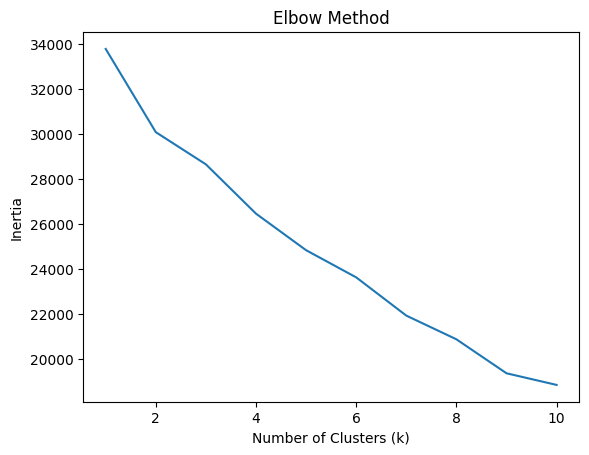

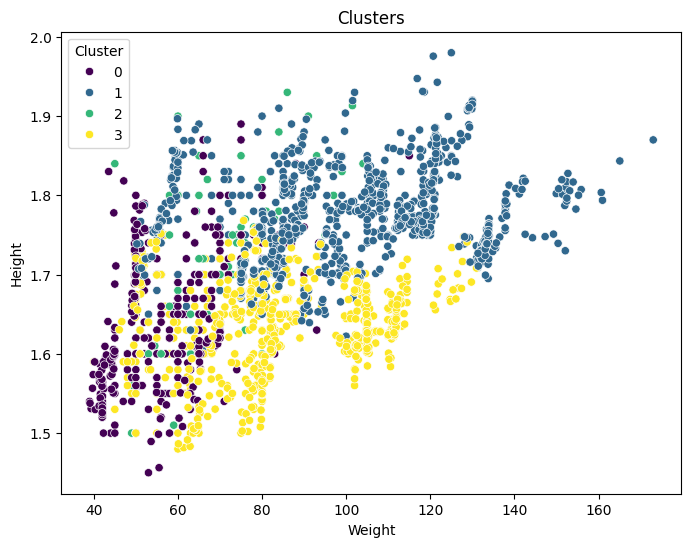

Cluster Counts:
NObeyesdad      0      1      2      3      4      5      6
Cluster                                                    
0           145.0  131.0   80.0   13.0    5.0    1.0    NaN
1            79.0   51.0  111.0  156.0  182.0  250.0  125.0
2             6.0   38.0   12.0    8.0    4.0    2.0    NaN
3            42.0   67.0   87.0  113.0  160.0   44.0  199.0

Cluster Percentages:
NObeyesdad          0          1          2          3          4          5  \
Cluster                                                                        
0           38.666667  34.933333  21.333333   3.466667   1.333333   0.266667   
1            8.280922   5.345912  11.635220  16.352201  19.077568  26.205451   
2            8.571429  54.285714  17.142857  11.428571   5.714286   2.857143   
3            5.898876   9.410112  12.219101  15.870787  22.471910   6.179775   

NObeyesdad          6  
Cluster                
0                 NaN  
1           13.102725  
2                 NaN  
3

In [6]:
# Separate features and target
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
k = 4  # Update this value based on your observation

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Weight', y='Height', hue='Cluster', palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Clusters')
plt.show()

# Analyze the relationship between clusters and the target variable
cluster_counts = data.groupby(['Cluster', 'NObeyesdad']).size().unstack()
cluster_percentages = cluster_counts.div(cluster_counts.sum(axis=1), axis=0) * 100

print("Cluster Counts:")
print(cluster_counts)
print("\nCluster Percentages:")
print(cluster_percentages)